In [1]:
import numpy as np
from matplotlib import pyplot as plt

from kaczmarz import randomized_kaczmarz, calculate_lamda_mu_nu, estimate_lamda_nu
from sketch import GaussianSketchFactory

In [6]:
m = 1500
n = 1000
k = 50
t_max = 2000

A = np.random.randn(m, n) / np.sqrt(m)
d, U = np.linalg.eigh(A.T @ A)
x = U[:, 0]

# x = np.random.randn(n)
b = A @ x
x0 = np.zeros(n)
x0 = np.random.randn(n)

Sf = GaussianSketchFactory((k, m))

lamda, mu, nu = calculate_lamda_mu_nu(A.T @ A, k)

S = Sf()
SAAS = S @ A @ A.T @ S.T
SS = S @ np.eye(m) @ S.T
evs = np.linalg.eigvals(SAAS)
lamda, lamda_prime = estimate_lamda_nu(evs, k)

num = np.trace(np.linalg.solve(SAAS, SS))
num2 = np.trace(np.linalg.inv(A.T @ A + lamda * np.eye(n)))
print(num, num2)
print(lamda, lamda_prime, num, lamda / lamda_prime * num2 / m)
# X = ranomized_kaczmarz(A, b, x0, Sf, t_max, accelerated=False)
# X_accel = ranomized_kaczmarz(A, b, x0, Sf, t_max, accelerated=True)

18.41150228165847
51.598179522069174 2.4980821629636782
380.29173502961874
78.92950415783295 51.75448960911661
18.353066601376938 0.10032668843315626 78.92950415783295 6.311737581499317


5335.6642520658215
5527.520561130371


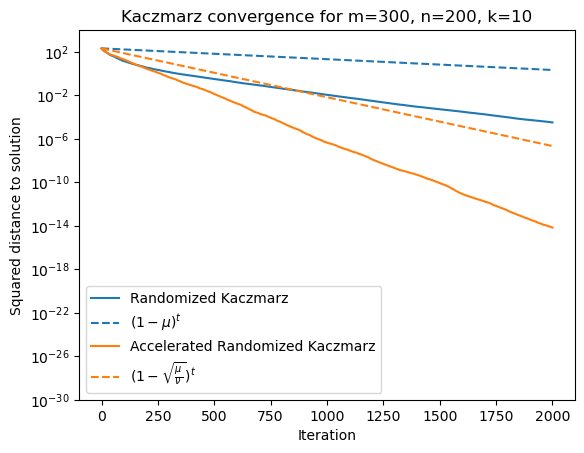

In [4]:
lamda, mu, nu = calculate_lamda_mu_nu(A.T @ A, k)
ts = np.arange(t_max + 1)

dists2 = np.linalg.norm(X - x[None, :], axis=1) ** 2
dists2_accel = np.linalg.norm(X_accel - x[None, :], axis=1) ** 2

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.semilogy(dists2, label='Randomized Kaczmarz', color=color_cycle[0])
plt.plot(ts, dists2[0] * (1 - mu) ** ts, label=r'$(1 - \mu)^t$', color=color_cycle[0], linestyle='--')

plt.semilogy(dists2_accel, label='Accelerated Randomized Kaczmarz', color=color_cycle[1])
plt.plot(ts, dists2_accel[0] * (1 - np.sqrt(mu / nu)) ** ts, label=r'$(1 - \sqrt{\frac{\mu}{\nu}})^t$', color=color_cycle[1], linestyle='--')

plt.xlabel('Iteration')
plt.ylabel('Squared distance to solution')
plt.title(f'Kaczmarz convergence for m={m}, n={n}, k={k}')
plt.ylim(1e-30, 1e4)
plt.legend(loc='lower left')
plt.show()

In [ ]:
ts = np.arange(3000, 20000)
slope = np.polyfit(ts, np.log(dists2[ts]), 1)[0]
slope_accel = np.polyfit(ts, np.log(dists2_accel[ts]), 1)[0]
print(f'Slope of RK: {slope}')
print(f'Slope of ARK: {slope_accel}')

rho = 1 - np.exp(slope)
rho_accel = 1 - np.exp(slope_accel)
sketch_factor = k / min(m, n)
print(f'rho of RK: {rho / sketch_factor}')
print(f'rho of ARK: {rho_accel / sketch_factor}')
print(f'rho of RK / rho of ARK: {rho / rho_accel}')

Slope of RK: -0.0004926372376081619
Slope of ARK: -0.0017086080528298205
rho of RK: 0.09850318236164224
rho of ARK: 0.34142984261416043
rho of RK / rho of ARK: 0.28850197044128245


In [ ]:
lamda, mu, nu = calculate_lamda_mu_nu(A, k)
print(f'lamda: {lamda}')
print(f'mu: {mu}')
print(f'nu: {nu}')
print(f'rho_accel_theory: {np.sqrt(mu / nu)}')

2.220446049250313e-16 59263.99927409064
lamda: 59263.99927409064
mu: 0.0001998755486460362
nu: 201.6247184225915
rho_accel_theory: 0.0009956528643631133
